In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
from matplotlib import font_manager,rc  ### 이 줄과

%matplotlib inline

# 윈도우 한글
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv(r"C:\Users\Jang\Desktop\project\194_후보지.csv",encoding="cp949")
df.drop("name",axis=1,inplace=True)

Text(3.5500000000000043, 0.5, '위도')

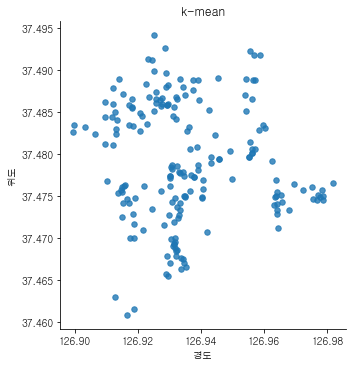

In [3]:
sb.lmplot( x='경도' , y='위도', data=df, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('경도')
plt.ylabel('위도')

In [4]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()


C:\Users\Jang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


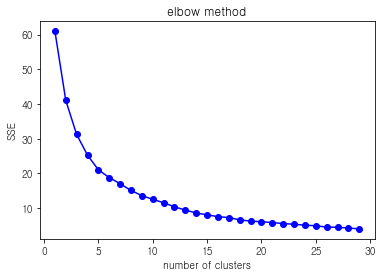

In [5]:
elbow(df,30)

# 실루엣

In [6]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


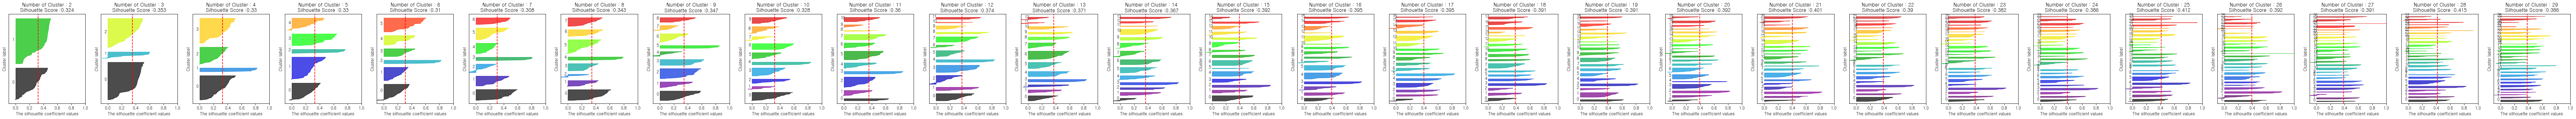

In [7]:
a = list(range(2,30))
visualize_silhouette(a, df)

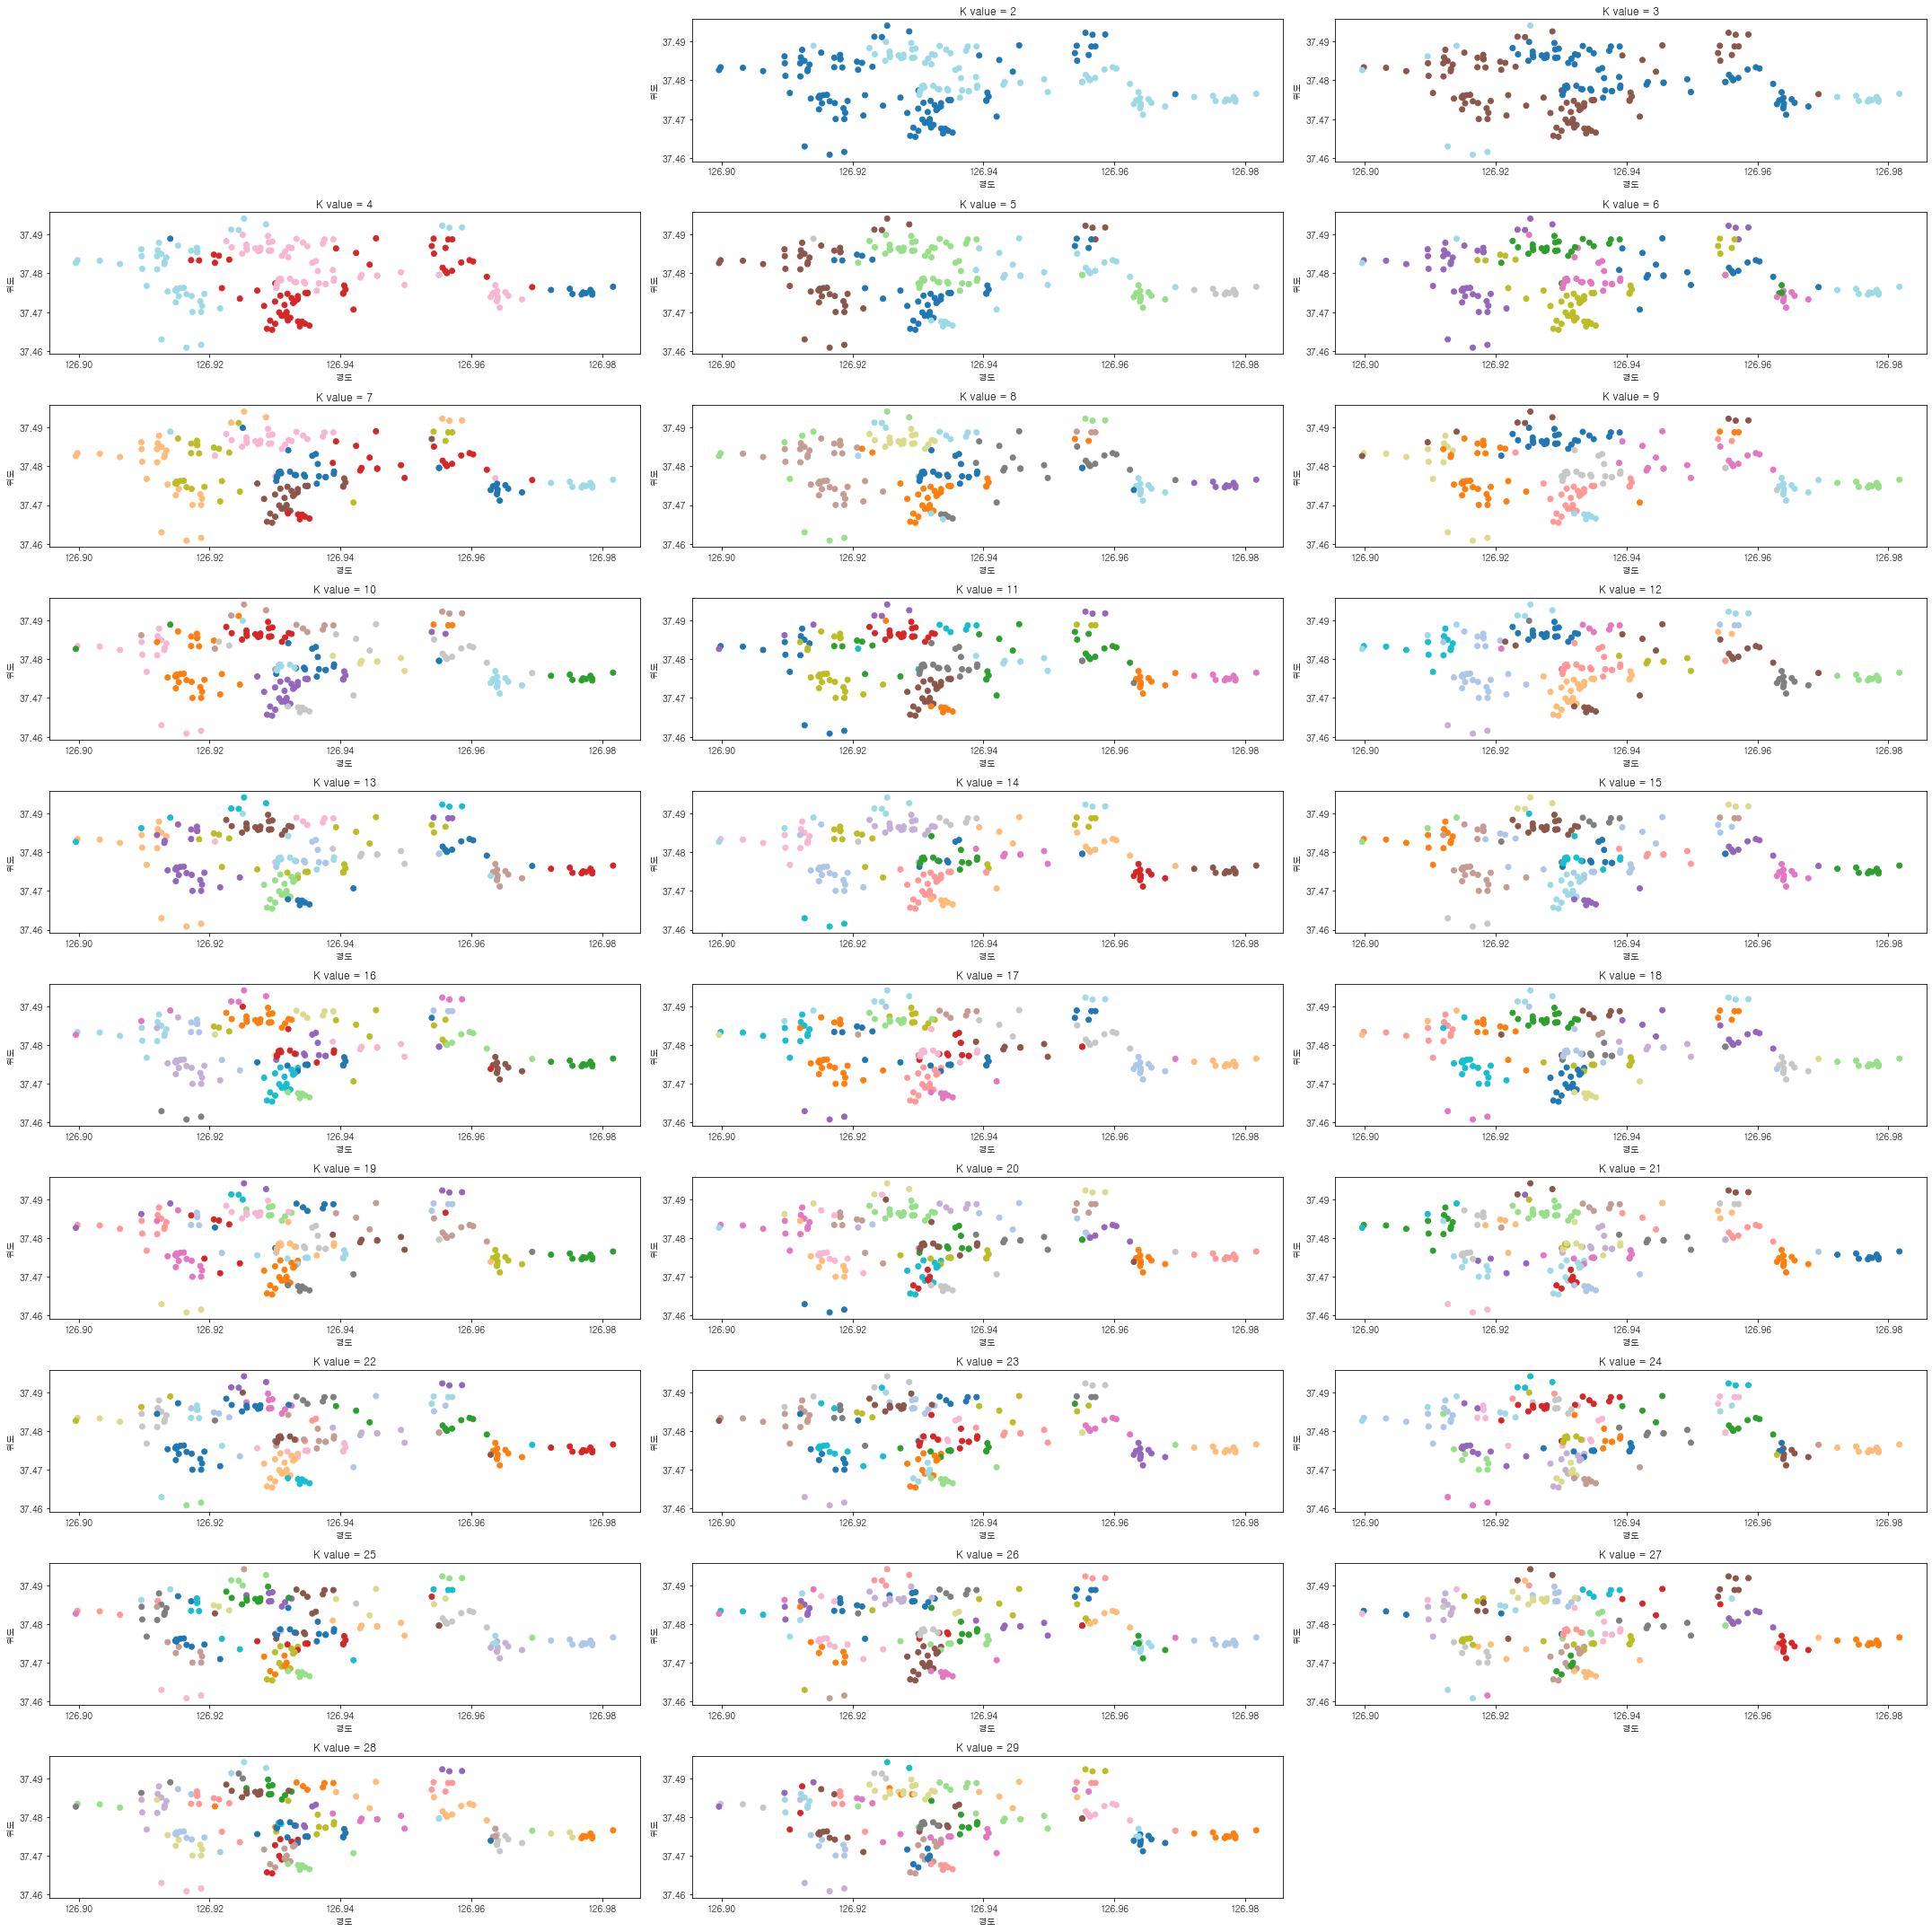

In [8]:
plt.figure(figsize = (30, 30))

for i in range(2, 30):
       # 클러스터 생성
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(df)
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
    plt.subplot(10, 3, i)
    plt.tight_layout()
        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('경도')
    plt.ylabel('위도')
        # 클러스터링 그리기
    plt.scatter(df['경도'], df['위도'], c=ids, cmap="tab20")  
plt.show()

k = 5 , k =28 사용

why? 엘보우와 클러스터링 그림을 보았을때 k =5가 적절하다고 보여짐.....
     실루엣 점수 최고점은 k= 28

# K =5 

In [10]:
estimator = KMeans(n_clusters = 5)
ids = estimator.fit_predict(df)
df["cluster"] = ids
df_copy = df.copy()

In [14]:
best_candi= pd.read_csv(r"C:\Users\Jang\Desktop\project\k=5.csv",encoding="cp949")

In [15]:
best_candi

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,서울특별시 관악구 봉천동 649-54번지,37.488867,126.933302,0.132213,0.117498,0.380337,0.385282,0.520135,0.473077,0.002639
1,서울특별시 관악구 신림동 1438-12번지,37.486712,126.923404,0.110299,0.037410,0.262063,0.652713,0.761431,0.536538,0.001581
2,서울특별시 관악구 봉천동 1637-27번지,37.474994,126.963737,0.224982,0.429977,0.189525,0.496534,0.704463,0.476923,0.017053
3,서울특별시 관악구 봉천동 1698-1 보라매삼성아파트,37.494104,126.925287,0.133674,0.268737,0.554244,0.385282,0.520135,0.075000,0.001179
4,서원동문화교앞,37.477774,126.933026,0.531775,0.303548,0.257029,0.478869,1.000000,0.698077,0.010645


In [16]:
import folium


cc = []
tv = []

for i in df_copy.index:   
    cc.append(df_copy.loc[i,"위도"]) #위도
    tv.append(df_copy.loc[i,"경도"]) #경도    

m = folium.Map(
    location = (sum(cc)/len(cc), sum(tv)/len(tv)),
)
    
for i in range(len(cc)):
    cm = cc[i],tv[i]
    folium.Circle(
        cm,
        radius =30,
        color=df_copy.loc[i,"cluster"]
    ).add_to(m)

In [17]:
cc = []
tv = []

for i in best_candi.index:   
    cc.append(best_candi.loc[i,"위도"]) #위도
    tv.append(best_candi.loc[i,"경도"]) #경도    

for i in range(len(cc)):
    cm = cc[i],tv[i]
    folium.Circle(
        cm,
        radius =30,
        color='red'
    ).add_to(m)

In [18]:
m

In [19]:
m.save("k=5.html")

k median으로 구한 5개의 최종 후보지가 k-mean-clustering(k=5)에 적절하게 배치 되었나 확인...! 하지만 노랑, 초록, 보라,검정에 배치가 없음...
따라서 각 군집별로 k-median 을 하고자함

In [21]:
import math
import random
from pyscipopt import Model, quicksum, multidict
from haversine import haversine


def kmedian(I,J,c,k):
    """kmedian -- minimize total cost of servicing customers from k facilities
    Parameters:
        - I: set of customers
        - J: set of potential facilities
        - c[i,j]: cost of servicing customer i from facility j
        - k: number of facilities to be used
    Returns a model, ready to be solved.
    """

    model = Model("k-median")
    x,y = {},{}

    for j in J:
        y[j] = model.addVar(vtype="B", name="y(%s)"%j)
        for i in I:
            x[i,j] = model.addVar(vtype="B", name="x(%s,%s)"%(i,j))

    for i in I:
        model.addCons(quicksum(x[i,j] for j in J) == 1, "Assign(%s)"%i)
        for j in J:
            model.addCons(x[i,j] <= y[j], "Strong(%s,%s)"%(i,j))
    model.addCons(quicksum(y[j] for j in J) == k, "Facilities")

    model.setObjective(quicksum(c[i,j]*x[i,j] for i in I for j in J), "minimize")
    model.data = x,y

    return model


def distance(x1,y1,x2,y2):
    return haversine((x1,y1), (x2,y2))


In [20]:
df_demand = pd.read_csv(r"C:\Users\Jang\Desktop\project\demand_list.csv",encoding="cp949")

In [ ]:
estimator = KMeans(n_clusters = 5)
ids = estimator.fit_predict(df)
df["cluster"] = ids
df_copy = df.copy()

In [12]:
for i in df_copy.index:
    if df_copy.loc[i,"cluster"] == 0:
        df_copy.loc[i,"cluster"] ='blue'
    elif df_copy.loc[i,"cluster"] == 1:
        df_copy.loc[i,"cluster"] ='green'
    elif df_copy.loc[i,"cluster"] == 2:
        df_copy.loc[i,"cluster"] ='purple'
    elif df_copy.loc[i,"cluster"] == 3:
        df_copy.loc[i,"cluster"] ='orange'
    elif df_copy.loc[i,"cluster"] == 4:
        df_copy.loc[i,"cluster"] ='black'
    else:
        pass

In [ ]:
last = []
I = df_demand.index

for k in range(5):
    data = df[df["cluster"]==k]
    J = data.index
    x_demand = df_demand["위도"].apply(lambda x : x)    # positions of the points in the plane
    y_demand = df_demand["경도"].apply(lambda x : x)  
    x_candi = data["위도"].apply(lambda x : x)       # positions of the points in the plane
    y_candi = data["경도"].apply(lambda x : x)  
    c = {}

    w = data["target"]

    for i in I:
        for j in J:
            c[i,j] = distance(x_demand[i],y_demand[i],x_candi[j],y_candi[j])* w[j]

    random.seed(67)

    k = 1
    model = kmedian(I,J,c,k)
    # model.Params.Threads = 1
    model.optimize()
    EPS = 1.e-1
    x,y = model.data
    edges = [(i,j) for (i,j) in x if model.getVal(x[i,j]) > EPS]
    facilities = [j for j in y if model.getVal(y[j]) > EPS]
    
    last.append(facilities[0])


In [ ]:
last

In [ ]:
import folium


cc = []
tv = []

for i in df_copy.index:   
    cc.append(df_copy.loc[i,"위도"]) #위도
    tv.append(df_copy.loc[i,"경도"]) #경도    

m = folium.Map(
    location = (sum(cc)/len(cc), sum(tv)/len(tv)),
)
    
for i in range(len(cc)):
    cm = cc[i],tv[i]
    folium.Circle(
        cm,
        radius =30,
        color=df_copy.loc[i,"cluster"]
    ).add_to(m)

In [ ]:
for i in last:
    cm = df_copy.loc[i,"위도"],df_copy.loc[i,"경도"]
    folium.Circle(
            cm,
            radius =30,
            color='red'
        ).add_to(m)


In [ ]:
m

In [ ]:
m.save("kmc&median 5.html")

파랑, 초록, 노랑 , 보라를 커버할수 있음이 k-median만 했을때보다 괜찮은 결과가 산출되었다.

In [ ]:
df.loc[[158,67,175,63,60],:].to_csv("kmc&median 5.csv",encoding="cp949", index = False)

# K = 28

In [9]:
estimator = KMeans(n_clusters = 28)
ids = estimator.fit_predict(df)

df["cluster"] = ids

df_copy = df.copy()

지원하는 색이 28개 보다 적어서 태블로로 시각화 하겠습니다.

In [10]:
df_demand = pd.read_csv(r"C:\Users\Jang\Desktop\project\demand_list.csv",encoding="cp949")

In [11]:
df_copy.to_csv("kmc28.csv",encoding="cp949", index = False)

In [12]:
df_candi = pd.read_csv("kmc28.csv",encoding="cp949")

In [13]:
import math
import random
from pyscipopt import Model, quicksum, multidict
from haversine import haversine


def kmedian(I,J,c,k):
    """kmedian -- minimize total cost of servicing customers from k facilities
    Parameters:
        - I: set of customers
        - J: set of potential facilities
        - c[i,j]: cost of servicing customer i from facility j
        - k: number of facilities to be used
    Returns a model, ready to be solved.
    """

    model = Model("k-median")
    x,y = {},{}

    for j in J:
        y[j] = model.addVar(vtype="B", name="y(%s)"%j)
        for i in I:
            x[i,j] = model.addVar(vtype="B", name="x(%s,%s)"%(i,j))

    for i in I:
        model.addCons(quicksum(x[i,j] for j in J) == 1, "Assign(%s)"%i)
        for j in J:
            model.addCons(x[i,j] <= y[j], "Strong(%s,%s)"%(i,j))
    model.addCons(quicksum(y[j] for j in J) == k, "Facilities")

    model.setObjective(quicksum(c[i,j]*x[i,j] for i in I for j in J), "minimize")
    model.data = x,y

    return model


def distance(x1,y1,x2,y2):
    return haversine((x1,y1), (x2,y2))

In [ ]:
last = []
I = df_demand.index

for k in range(28):
    data = df_candi[df_candi["cluster"]==k]
    J = data.index
    x_demand = df_demand["위도"].apply(lambda x : x)    # positions of the points in the plane
    y_demand = df_demand["경도"].apply(lambda x : x)  
    x_candi = data["위도"].apply(lambda x : x)       # positions of the points in the plane
    y_candi = data["경도"].apply(lambda x : x)  
    c = {}

    w = data["target"]

    for i in I:
        for j in J:
            c[i,j] = distance(x_demand[i],y_demand[i],x_candi[j],y_candi[j])* w[j]

    random.seed(67)

    k = 1
    model = kmedian(I,J,c,k)
    # model.Params.Threads = 1
    model.optimize()
    EPS = 1.e-1
    x,y = model.data
    edges = [(i,j) for (i,j) in x if model.getVal(x[i,j]) > EPS]
    facilities = [j for j in y if model.getVal(y[j]) > EPS]
    
    last.append(facilities[0])


In [ ]:
last